# Group Project - Lyrics analysis

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lyrics = pd.read_csv("contestants.csv")
lyrics = lyrics[["performer", "song", "lyrics"]]
lyrics

performer                             song  \
0                  Lys Assia                          Refrain   
1                Jetty Paerl            De Vogels Van Holland   
2                Fud Leclerc  Messieurs Les Noyés De La Seine   
3     Walter Andreas Schwarz    Im Wartesaal Zum Großen Glück   
4               Mathé Altéry                   Le Temps Perdu   
...                      ...                              ...   
1598      Aksel Kankaanranta                     Looking Back   
1599         Tornike Kipiani                  Take Me As I Am   
1600            Samanta Tīna                  Still Breathing   
1601                   Elisa                   Medo de sentir   
1602            Gjon's Tears                     Répondez-moi   

                                                 lyrics  
0     (Refrain d'amour...)\n\nRefrain, couleur du ci...  
1     De vogels van Holland zijn zo muzikaal\nZe ler...  
2     Messieurs les noyés de la Seine\nOuvrez-moi le...  
3     Es gibt einen Hafen, da fährt kaum ein Schiff\...  
4     Chante, carillon\nLe chant du temps perdu\nCha...  
...                                                 ...  
1598  We would fall asleep\nTalking 'bout our dreams...  
1599  How do you want me to talk like an Englishman?...  
1600  I will keep on going\nI will keep on running\n...  
1601  Qual é a saída\nEu acho que já não sei amar\nE...  
1602  Pourquoi la pluie\nEt les nuages aussi\nEt les...  

[1603 rows x 3 columns]

## Data Analysis

### 1. Tokenizing the lyrics of the songs

In [3]:
tokenized_lyrics = []
for index, row in lyrics.iterrows():
    lyrics_rows_removed = row['lyrics'].split("\\n")
    lyrics_space_separated = []
    for sep_row in lyrics_rows_removed:
        lyrics_space_separated.append(sep_row.split(" "))
    words_without_chars = []
    chars =",'.?-?!())-–"
    for line in lyrics_space_separated:
        for word in line:
            word = word.strip(chars)
            if (word != 'I' and not word.startswith("I'")):
                word = word.lower()
            if (word != ''):
                words_without_chars.append(word)
    tokenized_lyrics.append(words_without_chars)
tokenized_lyrics

[['refrain',
  "d'amour",
  'refrain',
  'couleur',
  'du',
  'ciel',
  'parfum',
  'de',
  'mes',
  'vingt',
  'ans',
  'jardin',
  'plein',
  'de',
  'soleil',
  'où',
  'je',
  'courais',
  'enfant',
  'partout',
  'je',
  "t'ai",
  'cherché',
  'mon',
  'amoureux',
  'lointain',
  'guettant',
  'par',
  'les',
  'sentiers',
  'où',
  'tu',
  'prenais',
  'ma',
  'main',
  'les',
  'jours',
  "s'en",
  'sont',
  'allés',
  'et',
  'nous',
  'avons',
  'grandi',
  "l'amour",
  'nous',
  'a',
  'blessés',
  'le',
  'temps',
  'nous',
  'a',
  'guéris',
  'mais',
  'seule',
  'et',
  'sans',
  'printemps',
  'je',
  'cours',
  'en',
  'vain',
  'les',
  'bois',
  'les',
  'champs',
  'dis',
  'souviens-toi',
  'nos',
  'amours',
  "d'autrefois",
  'les',
  'années',
  'passent',
  'à',
  "tire-d'aile",
  'et',
  'sur',
  'les',
  'toits',
  'de',
  'mon',
  'ennui',
  'coule',
  'la',
  'pluie',
  'où',
  'sont',
  'parties',
  'les',
  'caravelles',
  'volant',
  'mon',
  'cœur',
  'p

### 2. Finding most frequently used words, excluding uninteresting words (conjunctions etc)

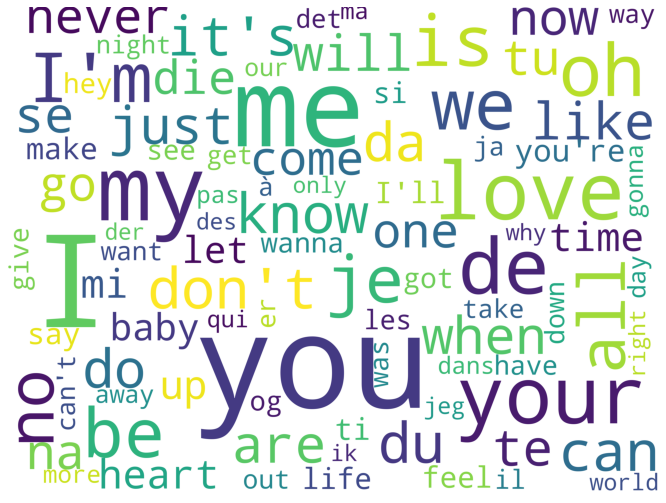

In [4]:
# code partially sourced from: https://stackoverflow.com/questions/21646791/convert-python-list-to-pandas-series
from wordcloud import WordCloud
tokenized_lyrics_to_one_array = []
uninteresting_words = ["the","a", "and", "but", "to", "that", "this", "so", "for", "of", "it", "on", "in", "la", "lo", "en", "at", "from", "what", "not", "el", "le", "i", "o", "que", "un", "ne", "with", "et", "yeah", "if", "how", "cause", "there", "y", "und", "e", ]
for song in tokenized_lyrics:
    for word in song:
        if (word not in uninteresting_words):
            tokenized_lyrics_to_one_array.append(word)
mySeries = pd.Series(tokenized_lyrics_to_one_array) 
data = mySeries.value_counts().to_dict()
wc = WordCloud(width=4000, height=3000, min_font_size = 80, max_font_size = 800, background_color = "white", max_words = 90).generate_from_frequencies(data)

plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(wc)
plt.axis('off')
plt.show()

### 3. Finding which word sequences appear most frequently, using n-grams

3.1 Trigrams

Text(0.5, 1.0, 'Top 15 Trigrams')

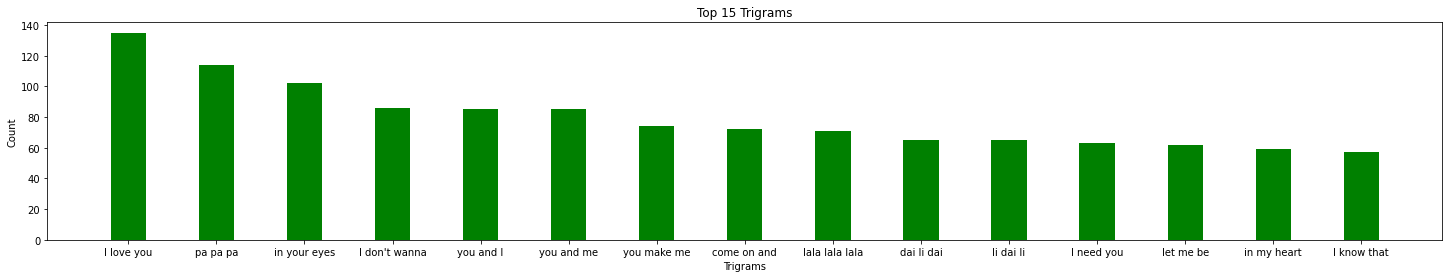

In [5]:
# code partially sourced from https://www.analyticsvidhya.com/blog/2021/09/what-are-n-grams-and-how-to-implement-them-in-python/
from collections import defaultdict

def generate_N_grams(text,ngram=1):
  words = [word for word in text.split(" ") if word not in set(['oh', 'la', 'laj', 'hey', 'yeah', 'na', 'no', 'the'])]  
  temp = zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

trigrams=defaultdict(int)
for song in tokenized_lyrics:
    lyrics_as_string = ' '.join(song)
    for trigram in generate_N_grams(lyrics_as_string, 3):
        trigrams[trigram] += 1
#get the count of every word in both the columns of df_train and df_test dataframes

df_trigrams=pd.DataFrame(sorted(trigrams.items(),key=lambda x:x[1],reverse=True))

most_freq_trig1=df_trigrams[0][:15]
most_freq_trig2=df_trigrams[1][:15]

plt.figure(1,figsize=(25,4))
plt.bar(most_freq_trig1,most_freq_trig2, color ='green',
        width = 0.4)
plt.xlabel("Trigrams")
plt.ylabel("Count")
plt.title("Top 15 Trigrams")

3.2 Bigrams

Text(0.5, 1.0, 'Top 15 Bigrams')

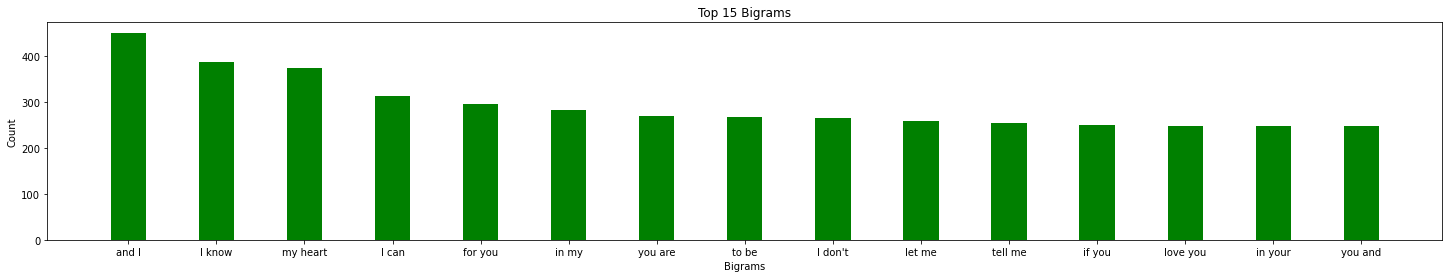

In [6]:
# code partially sourced from https://www.analyticsvidhya.com/blog/2021/09/what-are-n-grams-and-how-to-implement-them-in-python/
bigrams=defaultdict(int)
for song in tokenized_lyrics:
    lyrics_as_string = ' '.join(song)
    for bigram in generate_N_grams(lyrics_as_string, 2):
        bigrams[bigram] += 1
#get the count of every word in both the columns of df_train and df_test dataframes

df_bigrams=pd.DataFrame(sorted(bigrams.items(),key=lambda x:x[1],reverse=True))

most_freq_big1=df_bigrams[0][:15]
most_freq_big2=df_bigrams[1][:15]

plt.figure(1,figsize=(25,4))
plt.bar(most_freq_big1,most_freq_big2, color ='green',
        width = 0.4)
plt.xlabel("Bigrams")
plt.ylabel("Count")
plt.title("Top 15 Bigrams")

3.3 Skip-grams

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Teele\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text(0.5, 1.0, 'Top 15 Skipgrams of length 3')

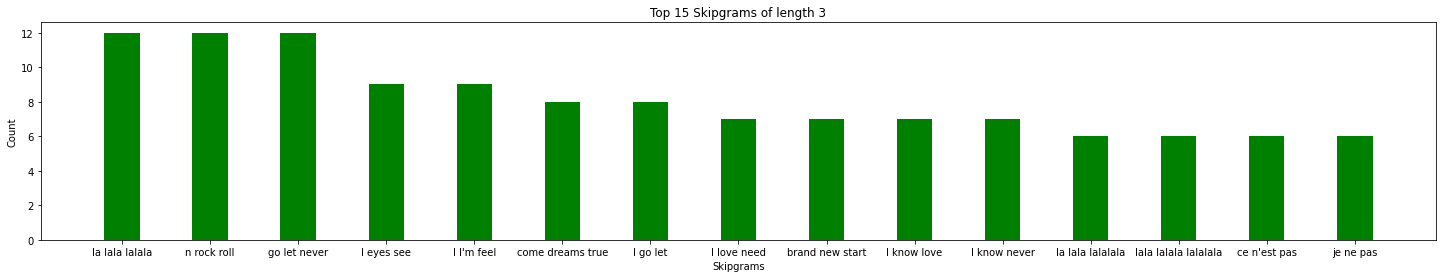

In [7]:
import nltk
from nltk.util import skipgrams
from nltk.corpus import stopwords
nltk.download('stopwords')

def all_different_words(words):
    for i in range(len(words)):
        for j in range(len(words)):
            if (i!=j and words[i] == words[j]):
                return False
    return True    

skipgrams_dict = defaultdict(int)

for song in tokenized_lyrics:
    song_meaningful = [i for n, i in enumerate(song) if (i not in song[:n] and i not in set(stopwords.words('english'))) ] # Skipgrams including english stopwords were uninteresting, consisted mainly of pronouns and prepositions
    for gram in list(skipgrams(song_meaningful, 3, 2)):
        if (all_different_words(gram)):
            gram_sorted = sorted(gram)
            gram_as_string = ' '.join(gram_sorted)
            skipgrams_dict[gram_as_string] += 1

skipgrams_most_freq = pd.DataFrame(sorted(skipgrams_dict.items(),key=lambda x:x[1],reverse=True))

most_freq_sg1=skipgrams_most_freq[0][:15]
most_freq_sg2=skipgrams_most_freq[1][:15]

plt.figure(1,figsize=(25,4))
plt.bar(most_freq_sg1,most_freq_sg2, color ='green',
        width = 0.4)
plt.xlabel("Skipgrams")
plt.ylabel("Count")
plt.title("Top 15 Skipgrams of length 3")

### 4. How many times certain words were used in songs

In [8]:
euro_count = 0
neuro_count = 0
eurovision_count = 0
Estonia_count = 0
stupid_count = 0
dragon_count = 0
fire_count = 0
you_count = 0
word_count = 0
teele_count = 0
maria_count = 0
sander_count = 0

for song in tokenized_lyrics:
    for word in song:
        if word == "euro":
            euro_count += 1
        elif word == "neuro":
            neuro_count += 1
        elif word == "eurovision":
            eurovision_count += 1
        elif word == "estonia":
            Estonia_count += 1
        elif word == "stupid":
            stupid_count += 1
        elif word == "dragon":
            dragon_count += 1
        elif word == "fire":
            fire_count += 1
        elif word == "you":
            you_count += 1
        elif word == "word":
            word_count += 1
        elif word == "teele":
            teele_count += 1
        elif word == "maria":
            maria_count += 1
        elif word == "sander":
            sander_count += 1

print("Euro: ", euro_count)
print("Neuro: ", neuro_count)
print("Eurovision: ", eurovision_count)
print("Estonia: ", Estonia_count)
print("Stupid: ", stupid_count)
print("Dragon: ", dragon_count)
print("Fire: ", fire_count)
print("You: ", you_count)
print("Word: ", word_count)
print("Teele: ", teele_count)
print("Sander: ", sander_count)
print("Maria: ", maria_count)

Euro:  38
Neuro:  31
Eurovision:  33
Estonia:  1
Stupid:  9
Dragon:  1
Fire:  172
You:  6483
Word:  71
Teele:  0
Sander:  0
Maria:  34
